哲學四 05113010 陳鳳庭

In [1]:
import pandas as pd

#### 將原本.xls的檔案，另存.csv檔，並更改編碼為UTF8

In [2]:
data = pd.read_csv('Concrete_Data.csv')

In [3]:
data.columns   #查看column

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash ', 'Water ',
       'Superplasticizer ', 'Coarse Aggregate  ', 'Fine Aggregate ', 'Age',
       'Concrete compressive strength'],
      dtype='object')

In [4]:
var = ['Cement', 'Blast Furnace Slag', 'Fly Ash ', 'Water ','Superplasticizer ', 'Coarse Aggregate  ', 'Fine Aggregate ', 'Age','Concrete compressive strength']

# 變數間的相關係數

In [8]:
import numpy as np

cm = np.corrcoef(data[var].values.T)
cm

array([[ 1.        , -0.27521591, -0.39746734, -0.08158675,  0.09238617,
        -0.10934899, -0.22271785,  0.08194602,  0.49783192],
       [-0.27521591,  1.        , -0.3235799 ,  0.10725203,  0.04327042,
        -0.28399861, -0.28160267, -0.04424602,  0.13482926],
       [-0.39746734, -0.3235799 ,  1.        , -0.25698402,  0.37750315,
        -0.00996083,  0.07910849, -0.15437052, -0.10575492],
       [-0.08158675,  0.10725203, -0.25698402,  1.        , -0.65753291,
        -0.1822936 , -0.45066117,  0.27761822, -0.28963338],
       [ 0.09238617,  0.04327042,  0.37750315, -0.65753291,  1.        ,
        -0.26599915,  0.22269123, -0.19270003,  0.36607883],
       [-0.10934899, -0.28399861, -0.00996083, -0.1822936 , -0.26599915,
         1.        , -0.17848096, -0.00301588, -0.16493461],
       [-0.22271785, -0.28160267,  0.07910849, -0.45066117,  0.22269123,
        -0.17848096,  1.        , -0.1560947 , -0.16724125],
       [ 0.08194602, -0.04424602, -0.15437052,  0.27761822, -0

# 線性迴歸模型

#### 先將data標準化，提升模型效率，再將data分割，區分train data跟test data

In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
from sklearn.model_selection import train_test_split

In [198]:
X = data[['Cement', 'Blast Furnace Slag', 'Fly Ash ', 'Water ','Superplasticizer ', 'Coarse Aggregate  ', 'Fine Aggregate ', 'Age']]
y = data['Concrete compressive strength']

sc = StandardScaler()
X_std = sc.fit_transform(X.values)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, random_state=6)

#### 得到線性迴歸係數

In [199]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [200]:
lr = LinearRegression()

lr.fit(X_train, y_train)
print(lr.coef_)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

[12.33653151  8.19463474  5.69003352 -3.40978914  1.3959833   1.06312366
  1.16714548  7.28030789]


#### 計算MSE、R^2

In [201]:
print('MSE_train: %.3f, MSE_test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2_train: %.3f, R^2_test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE_train: 101.479, MSE_test: 126.276
R^2_train: 0.616, R^2_test: 0.606


👆🏻發現發生overfitting

#### 將線性迴歸係數與相關係數放在一起比較

In [152]:
linear_con = pd.DataFrame(lr.coef_.reshape(1,-1)) #線性迴歸係數
coe = pd.DataFrame(cm[-1,:].reshape(1,-1)) #各變數與目標變數的相關係數
df = pd.concat([linear_con, coe], axis=0, ignore_index=True)
df.columns = var

In [153]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,12.336532,8.194635,5.690034,-3.409789,1.395983,1.063124,1.167145,7.280308,NaN
1,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.0


     index[0]:線性迴歸係數
     index[1]:各變數與目標變數的相關係數

Q1: 從上面的比較可以發現，在 'Fly Ash', 'Coarse Aggregate', 'Fine Aggregate'的地方，發生了變號

Q2: 從相關性來看，相關性大小與線性迴歸係數沒有呈現正向關係
            
            P.S.相關性第二大(Superplasticizer)的係數比相關性第三大(Age)的係數小

----

# 共線性問題處理

- 確定目標：data的附註說明，每個特徵變數代表混泥土的一種成分，回歸線模型探討的是這些成分的組成對混泥土的抗壓性影響

- 問題：由模型得出的回歸線係數，與其之間相關性關係出現**變號**（Q1）
- 原因：**特徵變數**與**特徵變數**之間的相關關係影響扭曲了迴歸線係數

#### 觀察

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

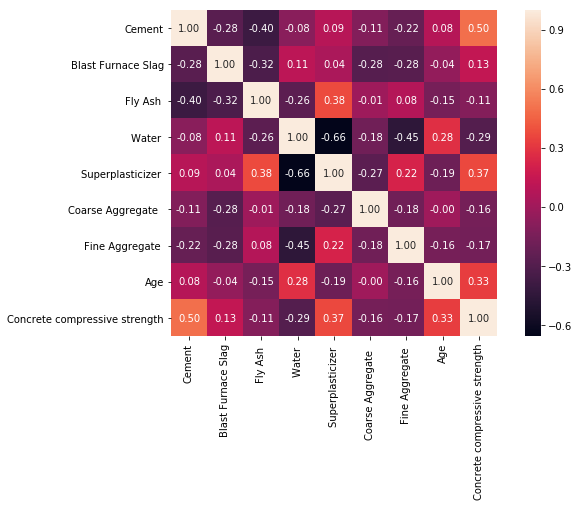

In [9]:
# 熱度圖

plt.figure(figsize=(10,6)) #調整圖的大小
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},xticklabels=var, yticklabels=var)

熱度圖觀察相關性，從相關性高的逐步開始

    No.1  Water與Superplasticizer：0.66的負相關
    No.2  Cement與Concrete compressive strength：0.5的正相關
    No.3  Water與Fine Aggregate：0.45的負相關
    No.4  Cement與Fly Ash：0.4的負相關

#### No.1   Water與Superplasticizer：0.66的負相關

測試分別將這兩個特徵變數刪除，對迴歸線係數的影響為何

   *P.S.僅為測試，因為 Water與 Superplasticizer這兩個特徵變數，對目標變數的相關性比起其他算高*

In [139]:
data1 = data[['Cement', 'Blast Furnace Slag', 'Fly Ash ', 'Water ', 'Superplasticizer ', 'Coarse Aggregate  ', 'Fine Aggregate ','Age','Concrete compressive strength']]

In [142]:
#刪除 Water

X = data1[['Cement', 'Blast Furnace Slag', 'Fly Ash ', 'Superplasticizer ', 'Coarse Aggregate  ', 'Fine Aggregate ', 'Age']]
y = data1['Concrete compressive strength']

sc = StandardScaler()
X_std = sc.fit_transform(X.values)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, random_state=6)

lr = LinearRegression()

lr.fit(X_train, y_train)
print(lr.coef_)

[14.87213241 10.58332195  7.70695439  2.52101113  3.44318458  3.91632728
  7.20698478]


❌變號無改變

In [143]:
#刪除 Superplasticizer

X = data1[['Cement', 'Blast Furnace Slag', 'Fly Ash ', 'Water ', 'Coarse Aggregate  ', 'Fine Aggregate ', 'Age']]
y = data1['Concrete compressive strength']

sc = StandardScaler()
X_std = sc.fit_transform(X.values)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, random_state=6)

lr = LinearRegression()

lr.fit(X_train, y_train)
print(lr.coef_)

[12.38603085  8.2363829   5.97896759 -4.52320163  0.45728706  0.86651359
  7.31064528]


❌變號無改變

#### No.2  Cement與Concrete compressive strength：0.5的正相關

跳過，此為**特徵變數**與**目標變數**的相關性問題

#### No.3  Water與Fine Aggregate：0.45的負相關

In [144]:
#刪除 Fine Aggregate

X = data1[['Cement', 'Blast Furnace Slag', 'Fly Ash ', 'Water ', 'Superplasticizer ', 'Coarse Aggregate  ', 'Age']]
y = data1['Concrete compressive strength']

sc = StandardScaler()
X_std = sc.fit_transform(X.values)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, random_state=6)

lr = LinearRegression()

lr.fit(X_train, y_train)
print(lr.coef_)

[11.26564436  7.14479269  4.80640059 -4.34923319  1.29218035  0.22959888
  7.23576359]


❌變號無改變

#### No.4  Cement與Fly Ash：0.4的負相關

In [193]:
#刪除 Fly Ash

X = data1[['Cement', 'Blast Furnace Slag', 'Water ', 'Superplasticizer ', 'Coarse Aggregate  ', 'Fine Aggregate ','Age']]
y = data1['Concrete compressive strength']

sc = StandardScaler()
X_std = sc.fit_transform(X.values)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, random_state=6)

lr_new = LinearRegression()

lr_new.fit(X_train, y_train)
print(lr_new.coef_)

[ 6.72192383  2.79641275 -7.11048538  1.93165723 -2.48693823 -3.57744807
  6.98314581]


⭕變號解決

        猜測：Cement與目標變數相關性最高，他受Fly Ash之間的相關性影響，因此扭曲迴歸線係數

#### 新舊模型比較

In [162]:
var1 = ['Cement', 'Blast Furnace Slag', 'Water ', 'Superplasticizer ', 'Coarse Aggregate  ', 'Fine Aggregate ','Age']

In [189]:
new_linear_con = pd.DataFrame(lr_new.coef_.reshape(1,-1), columns=var1) #新線性迴歸係數
df1 = pd.concat([df, new_linear_con],axis=0, join= 'outer', sort=False, ignore_index=True)

In [190]:
df1

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,12.336532,8.194635,5.690034,-3.409789,1.395983,1.063124,1.167145,7.280308,NaN
1,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.0
2,6.721924,2.796413,NaN,-7.110485,1.931657,-2.486938,-3.577448,6.983146,NaN


     index[0]:舊_線性迴歸係數
     index[1]:各變數與目標變數的相關係數
     index[2]:新_線性迴歸係數

#### 計算新MSE、R^2

In [194]:
y_train_pred = lr_new.predict(X_train)
y_test_pred = lr_new.predict(X_test)

In [195]:
print('MSE_train: %.3f, MSE_test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2_train: %.3f, R^2_test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE_train: 106.531, MSE_test: 131.776
R^2_train: 0.597, R^2_test: 0.589


👆🏻無共線性問題的迴歸模型，就無出現overfitting問題

雖然新模型的MSE較舊模型高，R^2也不如舊模型，但新模型沒有出現overfitting的問題，迴歸線係數也與相關係數同號，較符合模型用來預測的目標

---

[讀者提問：多元迴歸分析的變數選擇](https://taweihuang.hpd.io/2016/09/12/%e8%ae%80%e8%80%85%e6%8f%90%e5%95%8f%ef%bc%9a%e5%a4%9a%e5%85%83%e8%bf%b4%e6%ad%b8%e5%88%86%e6%9e%90%e7%9a%84%e8%ae%8a%e6%95%b8%e9%81%b8%e6%93%87/)

- 多元迴歸模型
   > 假設母體性質：反應變數與解釋變數存在**線性關係**
   
    - 解釋變數(explanatory variable)/特徵變數
    - 反應變數(response variable)/目標變數
    > 寫成矩陣：方便計算
    
    在寫出樣本的迴歸模型後，需要用抽樣得到的解釋變數實際值與反應變數實際值來估計母體參數
    > 傳統透過**最小平方法(least square estimation)**進行估計，目標是極小化估計的平方誤差(sum of square error)